# Executive Summary

<u>**Data**:</u> 

*   This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

<u>**Goal**:</u> 

*   The goal of this project is to classify whether someone has diabetes or not.

<u>**Variable Information**:</u>

*   The independent variables in this data set are 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', and 'Age'
*  The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0). 



In [112]:
# importing libraries
import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize, QuantileTransformer
from sklearn import preprocessing  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import missingno

# Exploratory Data Analysis

In [113]:
# importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/MBA6636_Business_Analytics/main/Final%20Project/diabetes.csv', sep=',')

In [114]:
# printing head of the dataset
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [115]:
# printing shape of the dataset
df.shape

(768, 9)

In [116]:
# listing all the variables in the dataset
df_vars = df.columns.values
for i in df_vars:
  print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [117]:
# checking the data types of all the variables in train dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [118]:
# printing summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [119]:
# understanding the spread of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [120]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

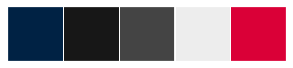

In [121]:
# setting up the color palette and size of the plots
customColors = ['#002244', '#171717','#444444','#EDEDED','#DA0037']
customPalette = sns.set_palette(sns.color_palette(customColors))
sns.palplot(sns.color_palette(customColors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

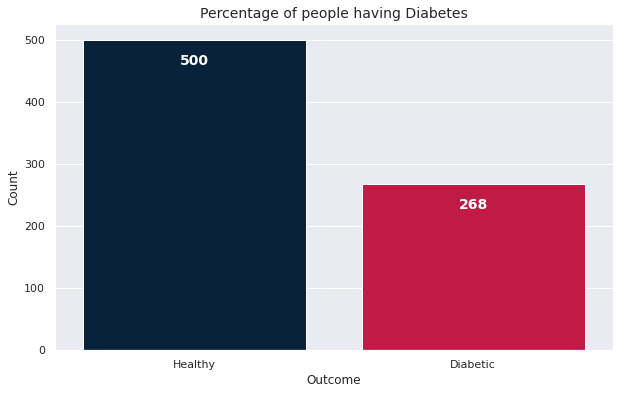

In [122]:
# visualizing the target variable - Outcome
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'Outcome', data = df, palette=['#002244', '#DA0037'])
plt.xticks( np.arange(2), ['Healthy', 'Diabetic'] )
plt.title('Percentage of people having Diabetes',fontsize= 14)
plt.xlabel('Outcome')
plt.ylabel('Count')
labels = (df['Outcome'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

Distribution is slightly imbalanced. 65% of the people are healthy and 35% people have diabetes.

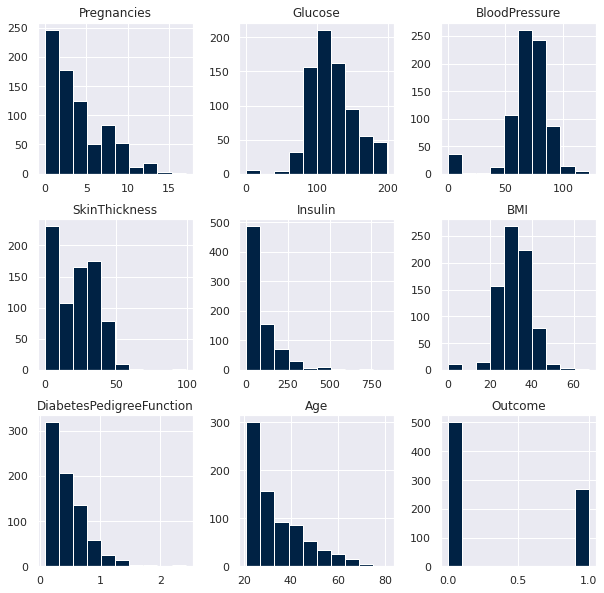

In [123]:
# plotting histogram for each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

Glucose and Blood Pressure are normally distributed. DiabetesPedigreeFunction, Age, Insulin, SkinThickness, and Pregnancies' distribution are skewed to the left. 

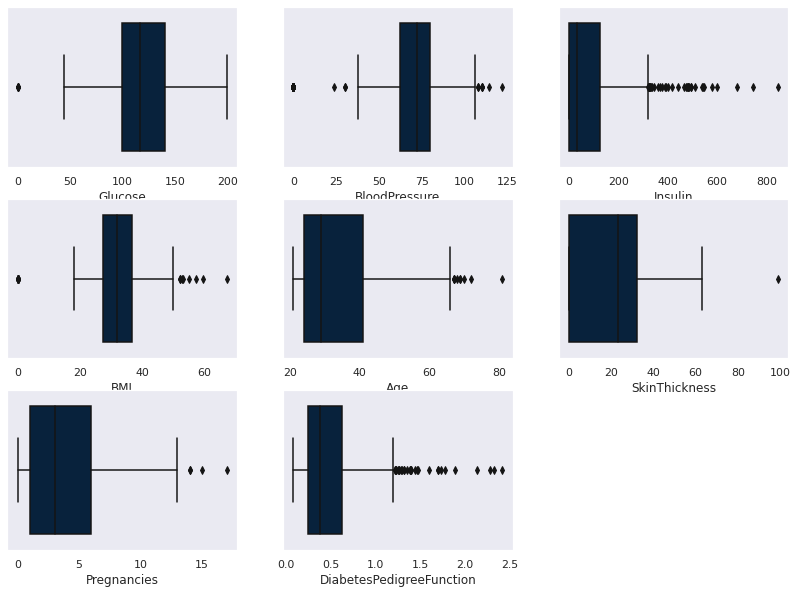

In [124]:
# checking for outliers
plt.figure(figsize=(14,10))
sns.set_style(style='dark')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

All the features in the dataset have outliers.

<Figure size 720x480 with 0 Axes>

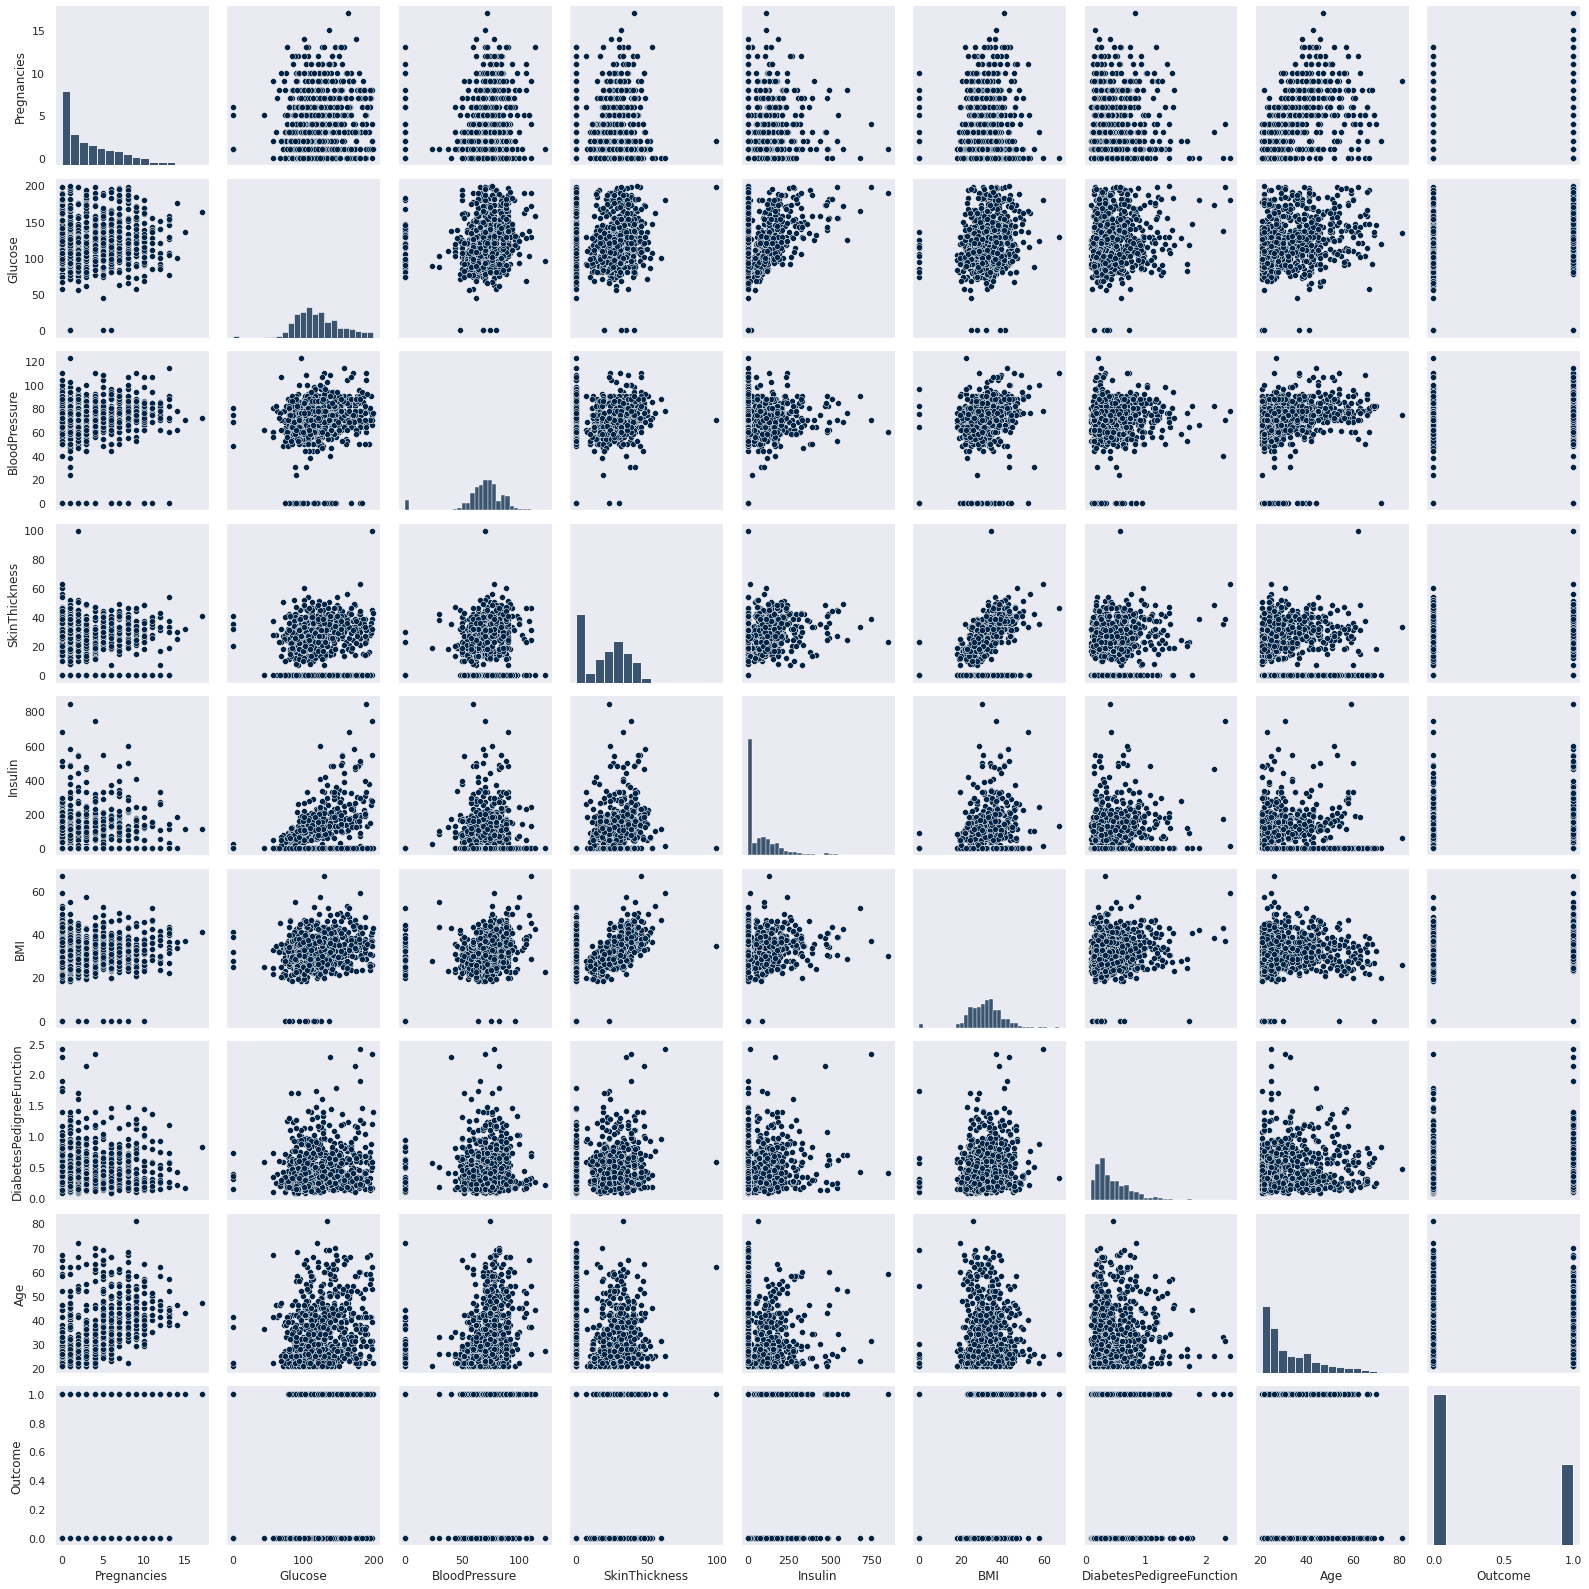

In [125]:
# plotting a pair plot
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

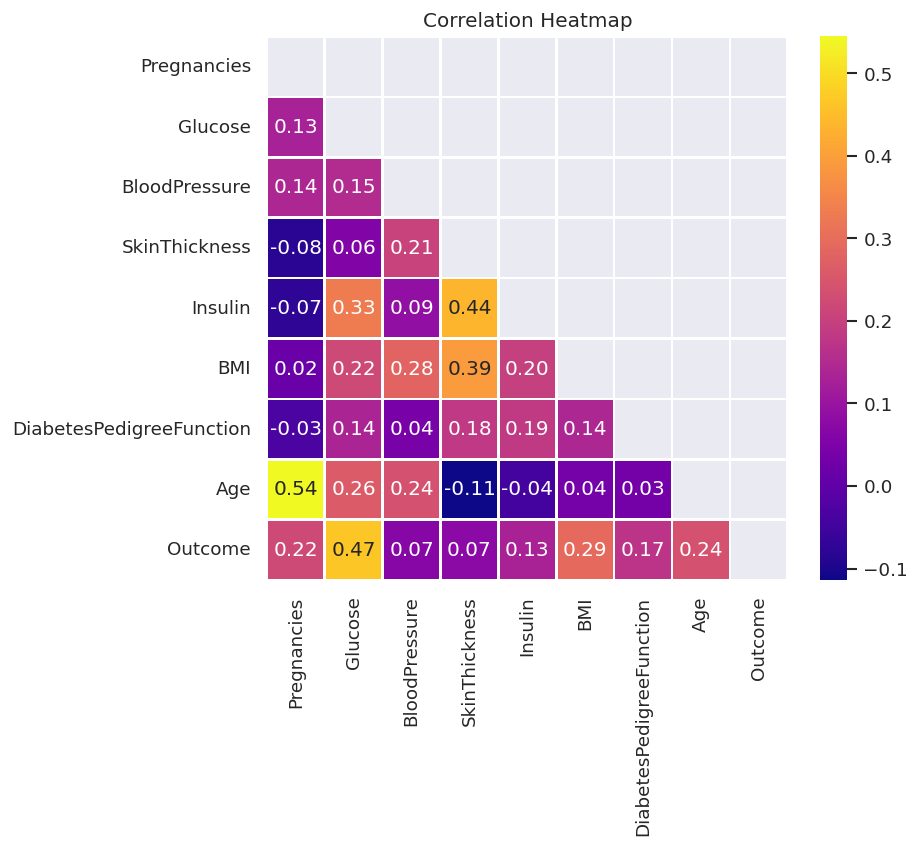

In [126]:
# plotting correlation heatmap
plt.figure(dpi = 120,figsize= (7,6))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

It can be seen that Glucose, BMI, and Age variables have the highest correlation with the target variable Outcome. Rest of the variables are not relevant to model building.

# Models

In [127]:
# dropping irrelavant features and handling outliers in the dataset
df_drop = df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
quant = QuantileTransformer()
X = quant.fit_transform(df_drop)
df_final = quant.transform(X)
df_final = pd.DataFrame(X)
df_final.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']

In [128]:
# splitting the dataframe
X = df_final.drop('Outcome' ,axis=1)
y = df_final['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       107
         1.0       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154

Cross Validation Score: [0.73170732 0.73170732 0.71544715 0.69918699 0.7704918 ]

Cross Validation Score (mean): 0.7297081167532987

F1 score: 0.6428571428571429

Precision score: 0.7297297297297297

Recall score: 0.574468085106383

ROC AUC Score: 0.74

Model Accuracy: 80.52 %

Confusion Matrix:



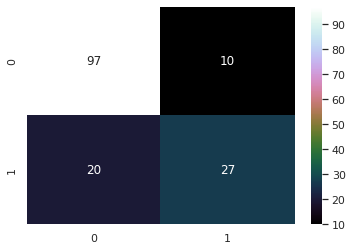

In [129]:
# K Nearest Neighbor
knn= KNeighborsClassifier()
hyperparameters = dict(n_neighbors=list(range(15,25)), p=[1,2], weights=['uniform', 'distance'], metric=['euclidean', 'manhattan', 'minkowski'])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
best_model = grid_search.fit(X_train,y_train)
knn_pred = best_model.predict(X_test)
roc = roc_auc_score(y_test, knn_pred)
knn_accuracy=round(accuracy_score(knn_pred, y_test) * 100, 2)

print("\nClassification Report:\n",classification_report(y_test,knn_pred))
print('Cross Validation Score: {}'.format(cross_val_score(knn, X_train, y_train, cv=5)))
print('\nCross Validation Score (mean): {}'.format(cross_val_score(knn, X_train, y_train, cv=5).mean()))
print("\nF1 score:",f1_score(y_test,knn_pred))
print("\nPrecision score:",precision_score(y_test,knn_pred))
print("\nRecall score:",recall_score(y_test,knn_pred))
print('\nROC AUC Score: {:.2f}'.format(roc))
print('\nModel Accuracy: {} %'.format(knn_accuracy))
print("\nConfusion Matrix:\n")
cm = np.array(confusion_matrix(y_test,knn_pred))
sns.heatmap(cm,annot=True,fmt='g',cmap='cubehelix')


Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       107
         1.0       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154

Cross Validation Score: [0.75609756 0.81300813 0.76422764 0.70731707 0.77868852]

Cross Validation Score (mean): 0.7638677862188459

F1 score: 0.6265060240963856

Precision score: 0.7222222222222222

Recall score: 0.5531914893617021

ROC AUC Score: 0.73

Model Accuracy: 79.87 %

Confusion Matrix:



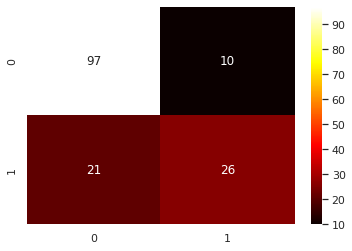

In [130]:
# support vector machine
model = SVC()
grid = dict(kernel=['poly', 'rbf', 'sigmoid'],C=[50, 10, 1.0, 0.1, 0.01],gamma=['scale'])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X, y)
svm_pred=grid_result.predict(X_test)
roc = roc_auc_score(y_test, svm_pred)
svc_accuracy=round(accuracy_score(svm_pred, y_test) * 100, 2)

print("\nClassification Report:\n",classification_report(y_test,svm_pred))
print('Cross Validation Score: {}'.format(cross_val_score(model, X_train, y_train, cv=5)))
print('\nCross Validation Score (mean): {}'.format(cross_val_score(model, X_train, y_train, cv=5).mean()))
print("\nF1 score:",f1_score(y_test,svm_pred))
print("\nPrecision score:",precision_score(y_test,svm_pred))
print("\nRecall score:",recall_score(y_test,svm_pred))
print('\nROC AUC Score: {:.2f}'.format(roc))
print('\nModel Accuracy: {} %'.format(svc_accuracy))
print("\nConfusion Matrix:\n")
cm = np.array(confusion_matrix(y_test,svm_pred))
sns.heatmap(cm,annot=True,fmt='g',cmap='hot')

Fitting 4 folds for each of 40 candidates, totalling 160 fits

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154

Cross Validation Score: [0.63414634 0.71544715 0.65853659 0.65853659 0.70491803]

Cross Validation Score (mean): 0.6743169398907105

F1 score: 0.5675675675675675

Precision score: 0.7777777777777778

Recall score: 0.44680851063829785

ROC AUC Score: 0.70

Model Accuracy: 79.22 %

Confusion Matrix:



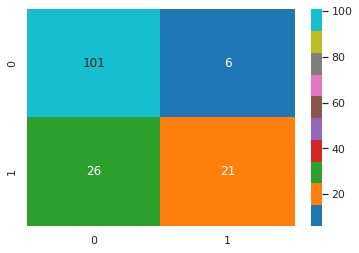

In [131]:
# decision tree
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid={'max_depth': [5, 10, 20,25],'min_samples_leaf': [10, 20, 50, 100,120],'criterion': ["gini", "entropy"]}, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
best_model=grid_search.fit(X_train, y_train)
dt_pred=best_model.predict(X_test)
roc = roc_auc_score(y_test, dt_pred)
dt_accuracy=round(accuracy_score(dt_pred, y_test) * 100, 2)

print("\nClassification Report:\n",classification_report(y_test,dt_pred))
print('Cross Validation Score: {}'.format(cross_val_score(dt, X_train, y_train, cv=5)))
print('\nCross Validation Score (mean): {}'.format(cross_val_score(dt, X_train, y_train, cv=5).mean()))
print("\nF1 score:",f1_score(y_test,dt_pred))
print("\nPrecision score:",precision_score(y_test,dt_pred))
print("\nRecall score:",recall_score(y_test,dt_pred))
print('\nROC AUC Score: {:.2f}'.format(roc))
print('\nModel Accuracy: {} %'.format(dt_accuracy))
print("\nConfusion Matrix:\n")
cm = np.array(confusion_matrix(y_test,dt_pred))
sns.heatmap(cm,annot=True,fmt='g',cmap='tab10')


Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       107
         1.0       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154

Cross Validation Score: [0.72357724 0.79674797 0.75609756 0.71544715 0.78688525]

Cross Validation Score (mean): 0.7557510329201652

F1 score: 0.611764705882353

Precision score: 0.6842105263157895

Recall score: 0.5531914893617021

ROC AUC Score: 0.72

Model Accuracy: 78.57 %

Confusion Matrix:



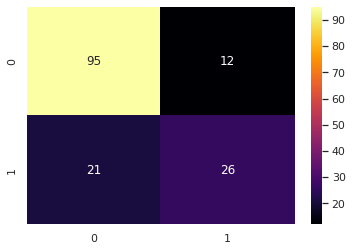

In [132]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 
lr_pred=logreg.predict(X_test)
roc = roc_auc_score(y_test, lr_pred)
logreg_accuracy=round(accuracy_score(lr_pred, y_test) * 100, 2)

print("\nClassification Report:\n",classification_report(y_test,lr_pred))
print('Cross Validation Score: {}'.format(cross_val_score(logreg, X_train, y_train, cv=5)))
print('\nCross Validation Score (mean): {}'.format(cross_val_score(logreg, X_train, y_train, cv=5).mean()))
print("\nF1 score:",f1_score(y_test,lr_pred))
print("\nPrecision score:",precision_score(y_test,lr_pred))
print("\nRecall score:",recall_score(y_test,lr_pred))
print('\nROC AUC Score: {:.2f}'.format(roc))
print('\nModel Accuracy: {} %'.format(logreg_accuracy))
print("\nConfusion Matrix:\n")
cm = np.array(confusion_matrix(y_test,lr_pred))
sns.heatmap(cm,annot=True,fmt='g',cmap='inferno')


Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       107
         1.0       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154

Cross Validation Score: [0.70731707 0.78861789 0.71544715 0.69918699 0.77868852]

Cross Validation Score (mean): 0.7346128215380514

F1 score: 0.6451612903225806

Precision score: 0.6521739130434783

Recall score: 0.6382978723404256

ROC AUC Score: 0.74

Model Accuracy: 78.57 %

Confusion Matrix:



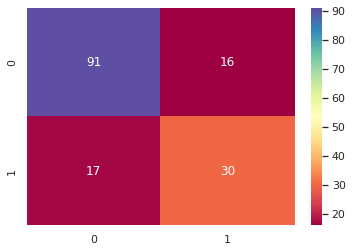

In [133]:
# random forest
model = RandomForestClassifier()
grid = dict(n_estimators=[1800],max_features=['sqrt', 'log2'])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
best_model = grid_search.fit(X_train, y_train)
rf_pred=best_model.predict(X_test)
roc = roc_auc_score(y_test, rf_pred)
rf_accuracy=round(accuracy_score(rf_pred, y_test) * 100, 2)

print("\nClassification Report:\n",classification_report(y_test,rf_pred))
print('Cross Validation Score: {}'.format(cross_val_score(model, X_train, y_train, cv=5)))
print('\nCross Validation Score (mean): {}'.format(cross_val_score(model, X_train, y_train, cv=5).mean()))
print("\nF1 score:",f1_score(y_test,rf_pred))
print("\nPrecision score:",precision_score(y_test,rf_pred))
print("\nRecall score:",recall_score(y_test,rf_pred))
print('\nROC AUC Score: {:.2f}'.format(roc))
print('\nModel Accuracy: {} %'.format(rf_accuracy))
print("\nConfusion Matrix:\n")
cm = np.array(confusion_matrix(y_test,rf_pred))
sns.heatmap(cm,annot=True,fmt='g',cmap='Spectral')

In [134]:
# comparing models' prediction accuracy
models = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier']
scores = [knn_accuracy, svc_accuracy, dt_accuracy, logreg_accuracy, rf_accuracy]
acc_score_tab = pd.DataFrame({'Model':models, 'Score':scores})
acc_score_tab

,Model,Score
0,KNeighborsClassifier,80.52
1,SVC,79.87
2,DecisionTreeClassifier,79.22
3,LogisticRegression,78.57
4,RandomForestClassifier,78.57
